In [1088]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score





In [1089]:
dataset = pd.read_csv('/content/car data.csv')

In [1090]:
dataset.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [1091]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [1092]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [1093]:
dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


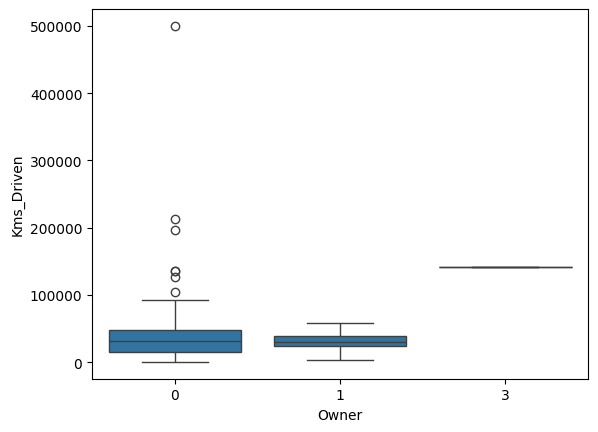

In [1094]:
sns.boxplot(x="Owner", y="Kms_Driven", data=dataset)
plt.show()

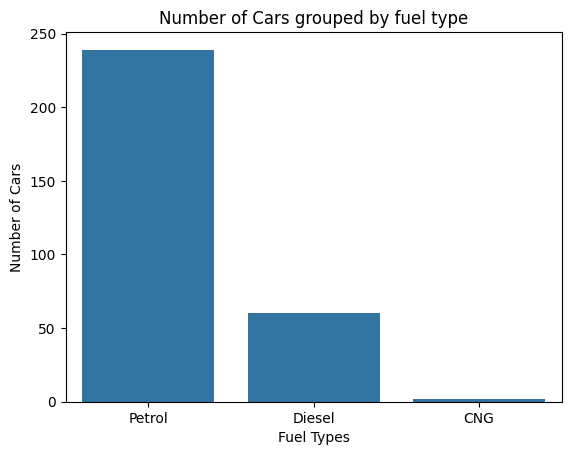

In [1095]:
sns.countplot(data=dataset,x="Fuel_Type")
plt.title('Number of Cars grouped by fuel type')
plt.ylabel('Number of Cars')
plt.xlabel('Fuel Types')
plt.show()

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

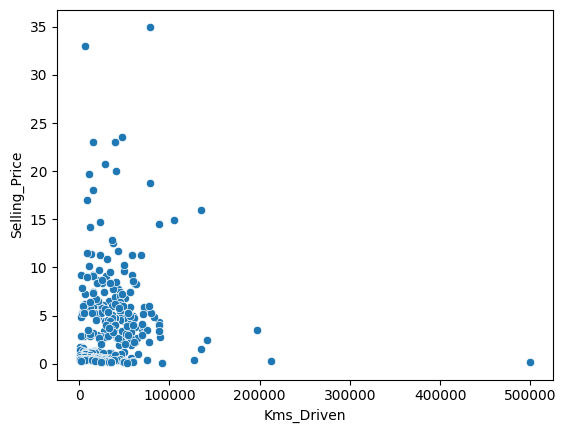

In [1096]:
sns.scatterplot(data=dataset,x="Kms_Driven",y="Selling_Price")

In [1097]:
Car_Name_le=LabelEncoder()
dataset['Car_Name']=Car_Name_le.fit_transform(dataset['Car_Name'])

In [1098]:
dataset['Car_Name']

,Car_Name
0,90
1,93
2,68
3,96
4,92
...,...
296,69
297,66
298,69
299,69


In [1099]:
Fuel_Type_le=LabelEncoder()
dataset['Fuel_Type']=Fuel_Type_le.fit_transform(dataset['Fuel_Type'])
dataset['Fuel_Type']

,Fuel_Type
0,2
1,1
2,2
3,2
4,1
...,...
296,1
297,2
298,2
299,1


In [1100]:
Seller_Type_le=LabelEncoder()
dataset['Seller_Type']=Seller_Type_le.fit_transform(dataset['Seller_Type'])
dataset['Seller_Type']

,Seller_Type
0,0
1,0
2,0
3,0
4,0
...,...
296,0
297,0
298,0
299,0


In [1101]:
Transmission_le=LabelEncoder()
dataset['Transmission']=Transmission_le.fit_transform(dataset['Transmission'])
dataset['Transmission']

,Transmission
0,1
1,1
2,1
3,1
4,1
...,...
296,1
297,1
298,1
299,1


In [1102]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [1103]:
x=dataset.drop(['Selling_Price'],axis=1)

x

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


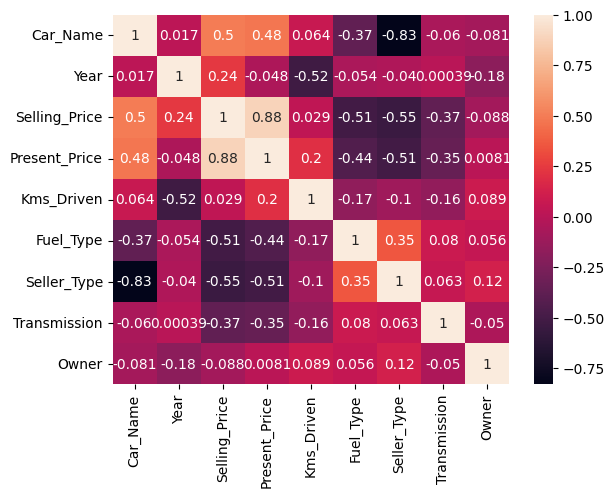

In [1104]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [1105]:
input_data=dataset.drop(['Selling_Price'],axis=1)
input_data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


In [1106]:
output_data=dataset["Selling_Price"]
output_data

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [1107]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)
input_data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1.074323,0.128897,-0.236215,-0.256224,0.500183,-0.737285,0.39148,-0.174501
1,1.191828,-0.217514,0.221505,0.155911,-1.852241,-0.737285,0.39148,-0.174501
2,0.212627,1.168129,0.257427,-0.773969,0.500183,-0.737285,0.39148,-0.174501
3,1.309332,-0.910335,-0.403079,-0.817758,0.500183,-0.737285,0.39148,-0.174501
4,1.152659,0.128897,-0.087890,0.141743,-1.852241,-0.737285,0.39148,-0.174501
...,...,...,...,...,...,...,...,...
296,0.251795,0.821718,0.460214,-0.076225,-1.852241,-0.737285,0.39148,-0.174501
297,0.134290,0.475308,-0.200292,0.593804,0.500183,-0.737285,0.39148,-0.174501
298,0.251795,-1.603156,0.390687,1.313340,0.500183,-0.737285,0.39148,-0.174501
299,0.251795,1.168129,0.564504,-0.719876,-1.852241,-0.737285,0.39148,-0.174501


In [1108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.3,random_state=20)

In [1109]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor



In [1110]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [1111]:
mean_squared_error(y_test,lr.predict(x_test)),mean_absolute_error(y_test,lr.predict(x_test)),r2_score(y_test,lr.predict(x_test))

(2.1672756866390714, 1.1356909566954705, 0.8955149870272073)

In [1112]:
from sklearn.model_selection import GridSearchCV
# Define the parameter space for GridSearchCV
lr_params = {
    'fit_intercept': [True, False],

    'copy_X': [True, False],
    'n_jobs': [1, 5, 10, None]
                }

# Initialize GridSearchCV with 3-fold cross-validation
lr_grid = GridSearchCV(lr, lr_params, cv=3)

# Fit the model on the training data
lr_grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, None]})

In [1113]:
# Best hyperparameters
print("Best Parameters:", lr_grid.best_params_)


Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}


In [1114]:
lr_grid.fit(x_train,y_train)
Y_pred = lr_grid.predict(x_test)


In [1115]:
mean_squared_error(y_test,lr_grid.predict(x_test)),mean_absolute_error(y_test,lr_grid.predict(x_test)),r2_score(y_test,lr_grid.predict(x_test))

(2.1672756866390714, 1.1356909566954705, 0.8955149870272073)

In [1116]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)


DecisionTreeRegressor()

In [1117]:
mean_squared_error(y_test,dt.predict(x_test)),mean_absolute_error(y_test,dt.predict(x_test)),r2_score(y_test,dt.predict(x_test))

(1.4204967032967035, 0.6881318681318682, 0.9315174265153455)

In [1118]:
# Define the hyperparameter grid for pre-pruning
dt_params = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
                }

# Create GridSearchCV object
dt_grid = GridSearchCV(dt, dt_params, cv=3)



# Fit the model on the training data
dt_grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [1119]:
# Best hyperparameters
print("Best Parameters:", dt_grid.best_params_)

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [1120]:
dt_grid.fit(x_train,y_train)
Y_pred = dt_grid.predict(x_test)

In [1121]:
mean_squared_error(y_test,dt_grid.predict(x_test)),mean_absolute_error(y_test,dt_grid.predict(x_test)),r2_score(y_test,dt_grid.predict(x_test))

(1.2548290844920387, 0.6726302982731555, 0.9395043122662858)

In [1122]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

In [1123]:
mean_squared_error(y_test,rf.predict(x_test)),mean_absolute_error(y_test,rf.predict(x_test)),r2_score(y_test,rf.predict(x_test))

(0.6356386382417593, 0.5191362637362641, 0.9693556699906084)

In [1124]:
# Define the hyperparameter grid
rf_params = {
    'n_estimators': [20,30],              # number of trees
     'max_depth': [5, 10, None],              # pre-pruning depth
     'min_samples_split': [2, 5],             # min samples to split an internal node
     'min_samples_leaf': [1, 2],              # min samples required at a leaf node

                                        }

# Create GridSearchCV object
rf_grid = GridSearchCV(rf, rf_params, cv=3)
# Fit the model on the training data
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [20, 30]})

In [1125]:
# Best hyperparameters
print("Best Parameters:", rf_grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


In [1126]:
mean_squared_error(y_test,rf_grid.predict(x_test)),mean_absolute_error(y_test,rf_grid.predict(x_test)),r2_score(y_test,rf_grid.predict(x_test))

(0.5251657301587299, 0.4860402930402929, 0.9746816021299097)

In [1127]:
x_test

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
211,0.447635,0.475308,0.829866,0.169691,-1.852241,-0.737285,0.39148,-0.174501
298,0.251795,-1.603156,0.390687,1.313340,0.500183,-0.737285,0.39148,-0.174501
28,0.016786,-1.256746,-0.426255,0.195630,0.500183,-0.737285,0.39148,-0.174501
286,0.956819,0.821718,0.031464,-0.215809,0.500183,-0.737285,0.39148,-0.174501
132,-2.215792,1.168129,-0.773890,-0.861548,0.500183,1.356327,0.39148,-0.174501
...,...,...,...,...,...,...,...,...
220,0.486803,1.168129,-0.370633,0.039688,0.500183,-0.737285,0.39148,-0.174501
18,1.309332,0.475308,-0.294154,-0.037278,-4.204665,-0.737285,0.39148,-0.174501
95,0.330131,-0.563924,1.272521,0.902905,0.500183,-0.737285,0.39148,-0.174501
131,-0.179054,0.475308,-0.788954,-0.488050,0.500183,1.356327,0.39148,-0.174501


In [1128]:
rf_grid.predict([[0.721811,-1.256746,1.485737,0.336838,-1.852241,-0.737285,-0.737285,-0.174501]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8.955])

In [1129]:
y_test

,Selling_Price
211,11.75
298,3.35
28,1.95
286,5.65
132,0.75
...,...
220,3.50
18,3.25
95,5.85
131,0.75


In [1130]:
#sx4	2013	4.75	9.54	43000	Diesel	Dealer	Manual	0

new_data=pd.DataFrame([["sx4",2013,9.54,43000,"Diesel","Dealer","Manual",0]],columns=x_train.columns)
new_data


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0


In [1131]:
new_data['Car_Name']=Car_Name_le.transform(new_data["Car_Name"])


In [1132]:
new_data['Fuel_Type']=Fuel_Type_le.transform(new_data["Fuel_Type"])


In [1133]:
new_data['Seller_Type']=Seller_Type_le.transform(new_data["Seller_Type"])

In [1134]:
new_data['Transmission']=Transmission_le.transform(new_data["Transmission"])

In [1135]:
new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)
rf_grid.predict(new_data)

array([5.18])

In [1136]:
import pickle as pkl
pkl.dump(rf_grid, open('random_regressor.pkl','wb'))